In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install matplotlib-venn -q
from matplotlib_venn import venn2
from scipy.stats import percentileofscore

# Проект: Исследование стартапов

## Введение

### Цель проекта
Цель проекта — подготовить и очистить данные о стартапах и инвестиционных сделках для дальнейшего анализа. Необходимо проверить корректность данных, определить ключевые бизнес-метрики и факторы, влияющие на успешность покупки компаний. Результат проекта — удобный для анализа датасет и выявленные признаки, которые помогут заказчику лучше оценивать и прогнозировать успешные сделки.

### Задачи:

1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных и предварительное исследование.
3. Провести исследовательский анализ данных объединенных таблиц.
4. Сформулировать выводы по проведённому анализу.

### Описание данных

Для анализа используются данные, представленные несколькими датасетами:

* `acquisition.csv` cодержит информацию о покупках одними компаниями других компаний;
* `company_and_rounds.csv` содержит информацию о компаниях и раундах финансирования;
* `people.csv` содержит информацию о сотрудниках;
* `education.csv` содержит информацию об образовании сотрудника;
* `degrees.csv` содержит информацию о типе образования сотрудника.

Опциональные датасеты:
* `fund.csv` содержит информацию о фондах;
* `investment.csv` содержит информацию о раундах инвестирования.

**Описание датасета `acquisition.csv`:**

 - `id` — идентификатор покупки;
 - `acquiring_company_id` — идентификатор покупающей компании;
 - `acquired_company_id` — идентификатор покупаемой компании;
 - `term_code` — варианты расчёта;
 - `price_amount` — сумма сделки;
 - `acquired_at` — дата сделки.

**Описание датасета `company_and_rounds.csv`:**

 - `company ID` — идентификатор компании;
 - `name` — название компании;
 - `category code` — категория области деятельности компании;
 - `status` — статус компании;
 - `founded at` — дата инвестирования;
 - `closed at` — дата закрытия компании;
 - `domain` — официальный сайт компании;
 - `network username` — ник компании в сети;
 - `country code` — код страны компании;
 - `investment rounds` — число инвестиционных раундов;
 - `funding rounds` — число раундов финансирования;
 - `funding total` — сумма финансирования;
 - `milestones` — вехи финансирования;
 - `funding round id` — идентификатор этапа финансирования;
 - `company id` — идентификатор компании;
 - `funded at` — дата финансирования;
 - `funding round type` — тип финансирования;
 - `raised amount` — сумма финансирования;
 - `pre money valuation` — предварительная денежная оценка;
 - `participants` — число участников;
 - `is first round` — является ли раунд первым;
 - `is last round` — является раунд последним;

**Описание датасета `people.csv`:**
 - `id` — идентификатор сотрудника;
 - `first_name` — имя сотрудника;
 - `last_name` — фамилия сотрудника;
 - `company_id` — идентификатор компании;
 - `network_username` — ник в социальных сетях.

**Описание датасета `education.csv`:**
 - `id` — идентификатор записи об образовании;
 - `person_id` — идентификатор работника;
 - `instituition` — название учебного заведения;
 - `graduated_at` — дата получения образования.

**Описание датасета `degrees.csv`:**
 - `id` — идентификатор записи;
 - `object_id` — идентификатор сотрудника;
 - `degree_type` — тип образования;
 - `subject` — специальность.



## Знакомство с данными: загрузка и первичная предобработка

### Вывод общей информации, исправление названия столбцов


Начнём с загрузки датасетов.

In [2]:
# Выгружаем данные в переменные 
acquisitions_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
companies_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

Познакомимся с данными датасета `acquisition.csv` — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [3]:
# Выводим первые строки датафрейма на экран
acquisitions_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [4]:
# Выводим информацию о датафрейме
acquisitions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


**Датасет `acquisition.csv` содержит 6 столбцов и 9407 строк**, в которых представлена информация о сделках по покупке одними компаниями других: идентификаторы покупателя и приобретённой компании, условия сделки.

1. Типы данных и их корректность:

- Целочисленные значения (int64) — 4 столбца:
`id`, `acquiring_company_id`, `acquired_company_id`, `price_amount` целочисленный формат корректен.

- Строковые данные (object) — 2 столбца:

`term_code` — вид расчёта,  для экономии памяти и упрощения группировок можно перевести в тип category.

`acquired_at` — дата сделки, сейчас хранится в строковом формате, но для дальнейшего анализа нужно привести к типу datetime.

Вывод:
Типы данных в целом заданы верно, но можно провести оптимизацию.

2. Другие особенности:
   
 - Столбец `price_amount` стоит проверить на адекватность данных: распределение цен, динамику сделок во времени и наличие аномальных значений.
 - Названия столбцов приведены к единому стилю snake_case, но возможно оптимизировать:
    - `acquired_at` переименовать в `deal_date`
    - `price_amount` переименовать в `deal_price`.

Познакомимся с данными датасета `company_and_rounds.csv` — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [5]:
# Выводим первые строки датафрейма на экран
companies_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
companies_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

**Датасет `company_and_rounds.csv` содержит 22 столбца и 217774 строки**, в которых представлена информация о компаниях и их инвестиционных раундах: название, категория деятельности, статус, даты основания и закрытия, сайт, страна, общее количество и суммы раундов финансирования, а также подробные данные о каждом раунде.

1. Типы данных и их корректность:

- Числовые значения с плавающей запятой (float64) — 12 столбцов:
  
Для стобцов `funding total`, `raised amount`, `pre money valuation` использование float64 корректно, но для оптимизации можно перевести в float32.

Столбцы `is first round`, `is last round` содержат бинарный признак (0 / 1). Для экономии памяти можно заменить на int8.

Для столбцов `company ID`, `company id`, `funding round id`, `investment rounds`, `funding rounds`, `milestones`, `participants` тип данных float64 подходит, но для оптимизации следует заменить на Int32 (целочисленный с поддержкой пропусков).

- Строковые данные (object) — 10 столбцов:

Столбцы `founded at`, `closed at`, `funded at` содержат даты, для дальнейшего анализа нужно привести к типу datetime.

Столбцы `category code`, `status`, `country code`, `funding round type` содержат категориальные признаки, их можно перевести в тип category.

Для столбцов `name`, `domain`, `network username` строковый формат корректен.

Вывод:
Типы данных заданы верно, но можно провести оптимизацию.

2. Другие особенности:
 - Денежные столбцы (`funding total`, `raised amount`, `pre money valuation`) содержат много нулей — стоит проверить, отражают ли они реально отсутствующие данные или ошибки загрузки.

 - В таблице найдены два схожих столбца: company ID (почти полное заполнение — 99%) и company id (частичное заполнение — 24%). Вероятной причиной их появления является объединение двух разных таблиц: одна содержала данные о компаниях, другая — о финансировании. Чтобы избежать путаницы, столбец с меньшей заполненностью переименуем.

In [7]:
# Переименование дублирующего столбца
companies_rounds_df = companies_rounds_df.rename(columns={'company  id' : 'company_id_incomplete'})

 - Названия столбцов содержат лишние пробелы и должны быть приведены к единому стилю snake_case.

Приведем названия столбцов датасета `company_and_rounds.csv` к единому стилю snake_case.

In [8]:
# Приведем названия всех столбцов к стилю snake case
companies_rounds_df.columns = companies_rounds_df.columns.str.strip().str.lower().str.replace(r'\s+', '_', regex=True)

In [9]:
# Проверяем результат после корректировки названий
display(companies_rounds_df.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_incomplete', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round'],
      dtype='object')

Познакомимся с данными датасета `people.csv` — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [10]:
# Выводим первые строки датафрейма на экран
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [11]:
# Выводим информацию о датафрейме
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


**Датасет `people.csv` содержит 5 столбцов и 226709 строк**, в которых представлена информация о сотрудниках: их идентификаторы, имена и фамилии, принадлежность к компании и никнеймы в социальных сетях.

1. Типы данных и их корректность:

- Числовые значения с плавающей запятой (float64) — 1 столбец:
`company_id` - тип данных float64 подходит, но для оптимизации следует заменить на Int32 (целочисленный с поддержкой пропусков).

- Целочисленные значения (int64) — 1 столбец:
`id` — уникальный идентификатор сотрудника, тип данных корректен, но для экономии памяти можно заменить на int32.

- Строковые данные (object) — 3 столбца:
`first_name`, `last_name`, `network_username` строковый формат корректен. 

Вывод:
Типы данных заданы верно, но можно провести оптимизацию.

2. Другие особенности:
 - Названия столбцов в целом корректны, соответствуют тематики и приведены к единому формату snake_case, но возможно оптимизировать:
    - `id` переименовать в `employee_id`.

Познакомимся с данными датасета `education.csv` — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [12]:
# Выводим первые строки датафрейма на экран
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [13]:
# Выводим информацию о датафрейме
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


**Датасет `education.csv` содержит 4 столбца и 109610 строк**, в которых представлена информация об образовании сотрудников: их учебные заведения и даты окончания обучения.

1. Типы данных и их корректность:

- Целочисленные значения (int64) — 2 столбца:
`id`, `person_id` целочисленный формат корректен, при оптимизации можно заменить на int32.

- Строковые данные (object) — 2 столбца:

`instituition` — название учебного заведения, корректный строковый тип, но для экономии памяти и упрощения группировок можно перевести в тип category.

`graduated_at` — дата окончания образования, сейчас хранится в строковом формате, но для дальнейшего анализа нужно привести к типу datetime.

Вывод:
Типы данных заданы верно, но можно провести оптимизацию.

2. Другие особенности:
 - Названия столбцов в целом корректны, соответствуют тематики и приведены к единому формату snake_case, но но есть опечатка:
    - `instituition` переименовать в `institution`.

Познакомимся с данными датасета `degrees.csv` — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [14]:
# Выводим первые строки датафрейма на экран
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [15]:
# Выводим информацию о датафрейме
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


**Датасет `degrees.csv` содержит 4 столбца и 109610 строк**, в которых представлена информация о типах образования сотрудников: уровень образования и специальность.

1. Типы данных и их корректность:

- Целочисленные значения (int64) — 1 столбец:
`id` — уникальный идентификатор записи, тип данных корректен. Для экономии памяти можно заменить на int32.

- Строковые данные (object) — 3 столбца:

`object_id` — идентификатор сотрудника в формате p:XXXX, строковый тип корректен, но для анализа желательно извлечь числовую часть и привести к int.

`degree_type` — тип образования, строковый тип корректен, но для экономии памяти и упрощения группировок можно перевести в тип category..

`subject` — специальность, строковый формат корректен.

Вывод:
Типы данных заданы верно, но можно провести оптимизацию.

2. Другие особенности:

 - `degree_type` содержит стандартизированные сокращения степеней (BA, MA, MBA и др.), что удобно для анализа.
 - `subject` может содержать сразу несколько специальностей через запятую (например, Computer Science, Psychology), что потребует дополнительной нормализации.
 - Названия столбцов приведены к формату snake_case, но возможно оптимизировать:
    - `subject` переименовать в `specialization`.

### Смена типов и анализ пропусков


Столбцы `acquired_at`, `founded_at`, `closed_at`, `funded_at`, `graduated_at` содержат значения дат, поэтому их необходимо преобразовать к типу datetime для корректного анализа и работы с временными данными.

In [16]:
# Приводим к datetime  столбцы в датафрейме com_df
for col in ['founded_at', 'closed_at', 'funded_at']:
    if col in companies_rounds_df.columns:
        companies_rounds_df[col] = pd.to_datetime(companies_rounds_df[col], errors='coerce')

In [17]:
# Приводим к datetime  столбец в датафрейме acq_df
acquisitions_df['acquired_at']=pd.to_datetime(acquisitions_df['acquired_at'], errors='coerce')

In [18]:
# Приводим к datetime  столбец в датафрейме edu_df
education_df['graduated_at']=pd.to_datetime(education_df['graduated_at'], errors='coerce')

In [19]:
# Проверим типы столбцов после прелбразований
print(companies_rounds_df[['founded_at', 'closed_at', 'funded_at']].dtypes)
print(acquisitions_df[['acquired_at']].dtypes)
print(education_df[['graduated_at']].dtypes)

founded_at    datetime64[ns]
closed_at     datetime64[ns]
funded_at     datetime64[ns]
dtype: object
acquired_at    datetime64[ns]
dtype: object
graduated_at    datetime64[ns]
dtype: object


Произведем оптимизацию разрядности числовых столбцов в датафрейме `companies_rounds_df`.

In [20]:
# Переводим большие числа с плавающей точкой в float32
companies_rounds_df[['funding_total', 'raised_amount', 'pre_money_valuation']] = companies_rounds_df[['funding_total', 'raised_amount', 'pre_money_valuation']].astype('float32')

# Бинарные признаки заменяем на Int8
binary_cols = ['is_first_round', 'is_last_round']
companies_rounds_df[['is_first_round', 'is_last_round']] = companies_rounds_df[['is_first_round', 'is_last_round']].astype('Int8')

# Остальные числовые столбцы с целыми значениями и пропусками в Int32
int32_cols = ['company_id', 'company_id_incomplete', 'funding_round_id', 
              'investment_rounds', 'funding_rounds', 'milestones', 'participants']

for col in int32_cols:
    companies_rounds_df[col] = companies_rounds_df[col].astype('Int32')

# Проверим результат
companies_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   company_id             217472 non-null  Int32         
 1   name                   217471 non-null  object        
 2   category_code          143886 non-null  object        
 3   status                 217472 non-null  object        
 4   founded_at             109956 non-null  datetime64[ns]
 5   closed_at              3449 non-null    datetime64[ns]
 6   domain                 147159 non-null  object        
 7   network_username       95534 non-null   object        
 8   country_code           108607 non-null  object        
 9   investment_rounds      217472 non-null  Int32         
 10  funding_rounds         217472 non-null  Int32         
 11  funding_total          217472 non-null  float32       
 12  milestones             217472 non-null  Int3

Произведем оптимизацию разрядности числовых столбцов в датафрейме `people_df`.

In [21]:
# Приводим company_id к Int32 
people_df['company_id'] = people_df['company_id'].astype('Int32')

# Приводим id к int32 (нет пропусков)
people_df['id'] = people_df['id'].astype('int32')

# Проверим результат
print("id:", people_df['id'].dtypes)
print("company_id:", people_df['company_id'].dtypes)

id: int32
company_id: Int32


Произведем оптимизацию разрядности числовых столбцов в датафрейме `education_df`.

In [22]:
# Приводим целочисленные столбцы к int32 
education_df[['id', 'person_id']] = education_df[['id', 'person_id']].astype('int32')

# Проверим результат
print("id:", education_df['id'].dtypes)
print("person_id:", education_df['person_id'].dtypes)

id: int32
person_id: int32


Произведем оптимизацию разрядности числовых столбцов в датафрейме `degrees_df`.

In [23]:
# Приводим id к int32 
degrees_df['id'] = degrees_df['id'].astype('int32')

# Проверим результат
print("id:", degrees_df['id'].dtypes)

id: int32


Далее проведём оценку полноты информации в каждом из датасетов.

Датасет **`acquisition.csv`** cодержит информацию о покупках одними компаниями других компаний.

Размер: 9407 строк, 6 столбцов.

Посчитаем количество пропусков в каждом столбце в абсолютных и относительных значениях.

In [24]:
# Применяем метод isna() к датафрейму acquisitions_df
acquisitions_df.isna().sum()

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [25]:
# Найдем долю строк с пропусками
acquisitions_df.isna().mean()

id                      0.000000
acquiring_company_id    0.000000
acquired_company_id     0.000000
term_code               0.805358
price_amount            0.000000
acquired_at             0.003083
dtype: float64

Пропуски:

 - В столбце `term_code` — значительное количество пропусков (более 80% строк).
 - В столбце `acquired_at` — 29 пропусков (около 0.3%).
 - Остальные поля (`id`, `acquiring_company_id`, `acquired_company_id`, `price_amount`) заполнены полностью.

Вывод: данные в целом достаточно полные, но информация об условиях сделок (`term_code`) сильно фрагментирована. Это ограничит анализ условий покупки, но позволит исследовать объемы сделок, участников и динамику по времени.

Датасет **`company_and_rounds.csv`** содержит информацию о компаниях и раундах финансирования.

Размер: 217774 строк, 22 столбца.

Посчитаем количество пропусков в каждом столбце в абсолютных и относительных значениях.

In [26]:
# Применяем метод isna() к датафрейму companies_rounds_df
companies_rounds_df.isna().sum()

company_id                  302
name                        303
category_code             73888
status                      302
founded_at               107818
closed_at                214325
domain                    70615
network_username         122240
country_code             109167
investment_rounds           302
funding_rounds              302
funding_total               302
milestones                  302
funding_round_id         164846
company_id_incomplete    164846
funded_at                165094
funding_round_type       164846
raised_amount            164846
pre_money_valuation      164846
participants             164846
is_first_round           164846
is_last_round            164846
dtype: int64

In [27]:
# Найдем долю строк с пропусками
companies_rounds_df.isna().mean()

company_id               0.001387
name                     0.001391
category_code            0.339288
status                   0.001387
founded_at               0.495091
closed_at                0.984162
domain                   0.324258
network_username         0.561316
country_code             0.501286
investment_rounds        0.001387
funding_rounds           0.001387
funding_total            0.001387
milestones               0.001387
funding_round_id         0.756959
company_id_incomplete    0.756959
funded_at                0.758098
funding_round_type       0.756959
raised_amount            0.756959
pre_money_valuation      0.756959
participants             0.756959
is_first_round           0.756959
is_last_round            0.756959
dtype: float64

Пропуски:

 - В столбцах `company id`, `status`, `investment_rounds`, `funding_rounds`, `funding_total`, `milestones` пропусков менее 1%.
 - В столбце `category_code` — пропусков около 34%.
 - В столбце `founded_at` — значительное количество пропусков (около 50%).
 - В столбце `closed_at` — значительное количество пропусков (более 98%).
 - В столбце `domain` — пропусков около 32%.
 - В столбце `network_username` — значительное количество пропусков (около 56%).
 - В столбце `country_code` — значительное количество пропусков (около 50%).
 - Данные о раундах: `funding round id`, `funded at`, `funding round type`, `company_id_incomplete`, `raised amount`, `pre money valuation`, `participants`, `is first round`, `is last round` заполнены лишь для 24% строк.

Вывод: данные по компаниям представлены достаточно полно, но большая часть информации о раундах финансирования отсутствует. Это серьёзное ограничение — анализ по инвестициям будет выборочным и может не отражать полной картины.

Датасет **`people.csv`** содержит информацию о сотрудниках.

Размер: 226709 строк, 5 столбцов.

Посчитаем количество пропусков в каждом столбце в абсолютных и относительных значениях.

In [28]:
# Применяем метод isna() к датафрейму people_df
people_df.isna().sum()

id                       0
first_name               9
last_name                4
company_id          192094
network_username    187842
dtype: int64

In [29]:
# Найдем долю строк с пропусками
people_df.isna().mean()

id                  0.000000
first_name          0.000040
last_name           0.000018
company_id          0.847315
network_username    0.828560
dtype: float64

Пропуски:

 - В столбце `first_name` — 9 пропусков (менее 0,01%).
 - В столбце `last_name` — 4 пропуска (менее 0,01%).
 - В столбце `company_id` — значительное количество пропусков (около 85%).
 - В столбце `network_username` — значительное количество пропусков (около 83%).

Столбец `company_id` — уникальный идентификатор, подходит для объединения с другими таблицами.

Столбец `id` подходит для связи с таблицами про образование сотрудников (degrees.csv, education.csv).

Датасет **`education.csv`** содержит информацию об образовании сотрудника.

Размер: 109610 строк, 4 столбца.

Посчитаем количество пропусков в каждом столбце в абсолютных и относительных значениях.

In [30]:
# Применяем метод isna() к датафрейму education_df
education_df.isna().sum()

id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [31]:
# Найдем долю строк с пропусками
education_df.isna().mean()

id              0.000000
person_id       0.000000
instituition    0.000502
graduated_at    0.470359
dtype: float64

Пропуски:

 - В столбце `instituition` — 55 пропусков (менее 0,1%).
 - В столбце `graduated_at` — значительное количество пропусков (около 47%).

Столбец `person_id` — подходит для объединения с датафреймом people.csv.

Датасет **`degrees.csv`** содержит информацию о типе образования сотрудника.

Размер: 109610 строк, 4 столбца.

Посчитаем количество пропусков в каждом столбце в абсолютных и относительных значениях.

In [32]:
# Применяем метод isna() к датафрейму degrees_df
degrees_df.isna().sum()

id                 0
object_id          0
degree_type    11221
subject        28312
dtype: int64

In [33]:
# Найдем долю строк с пропусками
degrees_df.isna().mean()

id             0.000000
object_id      0.000000
degree_type    0.102372
subject        0.258298
dtype: float64

Пропуски:

 - В столбце `degree_type` — около 10% пропусков (11221 строк).
 - В столбце `subject` — около 26% пропусков (28312 строк).

`object_id` хранится в текстовом формате - это усложняет объединение с таблицей people.csv, где используется числовой id. Для удобства стоит создать новый столбец с числовым идентификатором (person_id).

Таким образом, данные датасетов про сотрудников и их образование содержат неполные сведения, однако остаются информативными. Анализ по уровням образования сотрудников возможен, но распределение по специальностям может быть искажено из-за пропусков.

Проверим данные на наличие полных дубликатов.

Для оптимизации проверки выполним нормализацию текстовых столбцов в датфреймах — уберем лишние пробелы c помощью метода str.strip и приведем к нижнему регистру с помощью метода str.lower.

In [34]:
# Нормализация в датафрейме acquisitions_df
acquisitions_df['term_code'] = acquisitions_df['term_code'].str.strip().str.lower()         

In [35]:
# Нормализация в датафрейме companies_rounds_df
for column in ['category_code', 'status', 'country_code', 'funding_round_type', 'name', 'domain', 'network_username']:
    companies_rounds_df[column] = companies_rounds_df[column].str.strip().str.lower()         

In [36]:
# Нормализация в датафрейме people_df
for column in ['first_name', 'last_name', 'network_username']:
    people_df[column] = people_df[column].str.strip().str.lower()         

In [37]:
# Нормализация в датафрейме education_df
education_df['instituition'] = education_df['instituition'].str.strip().str.lower()

In [38]:
# Нормализация в датафрейме degrees_df
for column in ['object_id', 'degree_type', 'subject']:
    degrees_df[column] = degrees_df[column].str.strip().str.lower()         

In [39]:
# Проверяем полные дубликаты в датафреймах
print(f"Полных дубликатов в датафрейме acquisitions_df: {acquisitions_df.duplicated().sum()}")
print(f"Полных дубликатов в датафрейме companies_rounds_df: {companies_rounds_df.duplicated().sum()}")
print(f"Полных дубликатов в датафрейме people_df: {people_df.duplicated().sum()}")
print(f"Полных дубликатов в датафрейме education_df: {education_df.duplicated().sum()}")
print(f"Полных дубликатов в датафрейме degrees_df: {degrees_df.duplicated().sum()}")

Полных дубликатов в датафрейме acquisitions_df: 0
Полных дубликатов в датафрейме companies_rounds_df: 0
Полных дубликатов в датафрейме people_df: 0
Полных дубликатов в датафрейме education_df: 0
Полных дубликатов в датафрейме degrees_df: 0


В датафреймах нет полных дубликатов строк.

**Вывод:**

В целом объём данных достаточно для исследования: возможно проводить анализ сделок, компаний и уровня образования сотрудников. Однако следует учитывать ограничения:
 - данные о финансировании содержат значительные пропуски, поэтому выводы будут частично выборочными;
 - информация об образовании неполна, что приведёт к неполному отображению профилей сотрудников.

## Предобработка данных, предварительное исследование


### Раунды финансирования по годам


На основе датасета `company_and_rounds.csv` составим сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года будет указан:
 - типичный размер средств, выделяемый в рамках одного раунда;
 - общее количество раундов финансирования за этот год.

In [40]:
# Добавим столбец с годом
companies_rounds_df['year'] = companies_rounds_df['funded_at'].dt.year

# Составим сводную таблицу с группировкой по году
pivot = (companies_rounds_df.groupby('year').agg(
        typical_round_size=('raised_amount', 'median'),   # медиана размера
        rounds_count=('raised_amount', 'count')           # количество раундов
    ).reset_index())

Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

In [41]:
# Отфильтруем данные по количеству раундов (более 50)
pivot = pivot[pivot['rounds_count'] > 50]

# Вывод таблицы на экран
display(pivot)

,year,typical_round_size,rounds_count
15,1999.0,2000000.0,76
16,2000.0,4200000.0,125
17,2001.0,3000000.0,96
18,2002.0,4200000.0,116
19,2003.0,3000000.0,159
20,2004.0,5000000.0,291
21,2005.0,5500000.0,1633
22,2006.0,5000000.0,2436
23,2007.0,3973320.0,3279
24,2008.0,3110000.0,3774


На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

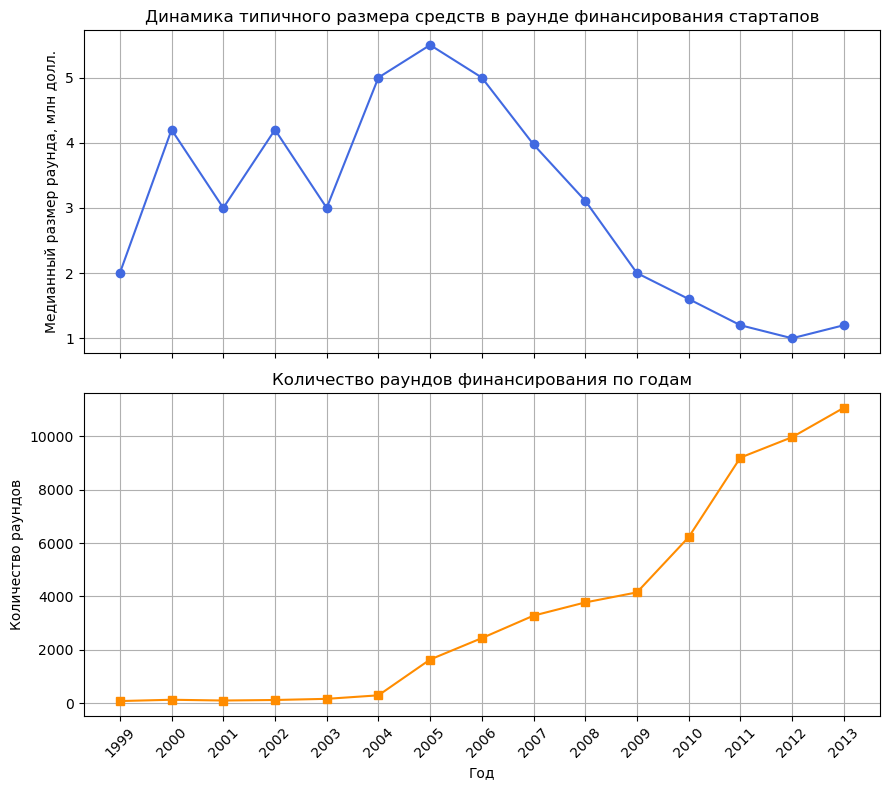

In [42]:
# Создаём контейнер для графиков и задаём размер области вывода
fig, axes = plt.subplots(2, 1, figsize=(9, 8), sharex=True)

# Строим график медианного размера раунда
axes[0].plot(pivot['year'], pivot['typical_round_size'] / 1e6, marker='o', linestyle='-', color='royalblue')

# Настраиваем оформление графика
axes[0].set_title('Динамика типичного размера средств в раунде финансирования стартапов')
axes[0].set_ylabel('Медианный размер раунда, млн долл.')
axes[0].grid(True)

# Строим график количества раундов
axes[1].plot(pivot['year'], pivot['rounds_count'], marker='s', linestyle='-', color='darkorange')

# Настраиваем оформление графика
axes[1].set_title('Количество раундов финансирования по годам')
axes[1].set_xlabel('Год')
axes[1].set_ylabel('Количество раундов')
axes[1].grid(True)
plt.xticks(pivot['year'], rotation=45)

# Выводим график
plt.tight_layout()
plt.show()

**Результаты:**
 - Максимальный типичный размер раунда был в 2005 году — 5500000 долл.
 - Тенденция в 2013 году
     - Количество раундов: 11 072 — это рекордное значение за весь период (с 1999 года).
     - Типичный размер раунда равен 1200000 долл., что значительно ниже максимума 2005–2006 гг.

**Вывод:**

В 2013 году наблюдается значительный **рост числа раундов финансирования**, что говорит о высокой активности инвесторов и большом числе стартапов, привлекающих средства.

При этом типичный **размер одного раунда снизился** по сравнению с пиковыми значениями 2005–2006 гг, что может означать:
 - более мелкие стартапы получают финансирование;
 - средства распределяются на большее количество сделок;
 - рынок стал более фрагментированным и зрелым.


### Люди и их образование


Определим зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

Для этого сначала объединим данные из двух источников:
 - `people.csv` содержит информацию о сотрудниках
 - `education.csv` содержит информацию об образовании сотрудника
   
Объединение выполним по столбцам, содержащим идентификатор сотрудника, с использованием параметра `how='left'`, что позволяет сохранить информацию обо всех сотрудниках из people.csv, даже если у некоторых из них отсутствуют данные об образовании.

In [43]:
# Объединим 2 датафрейма
people_education_df = people_df.merge(
    education_df,
    left_on='id',
    right_on='person_id',
    how='left')

Добавим новый `бинарный признак is_edu`, отражающий наличие сведений об образовании, для каждого сотрудника.

In [44]:
# Создадим новый столбец, показывающий есть ли сведения об образовании
people_education_df['is_edu'] = people_education_df['instituition'].notna()

Данные из объединенного датафрейма сгруппируем по компаниям, для каждой из которых найдем численность сотрудников и долю сотрудников, имеющих информацию об образовании.

In [45]:
# Сгруппируем по компаниям
company_stats = (
    people_education_df
    .groupby("company_id", as_index=False)
    .agg(
        employee_count=("id_x", "count"),
        share_with_edu=("is_edu", "mean") 
    )
    .dropna(subset=["company_id"])
)

Рассчитаем долю сотрудников, у которых нет сведений об образовании.

In [46]:
# Найдем долю сотрудников без сведений об образования
company_stats['share_without_edu'] = 1 - company_stats['share_with_edu']

# Удалим столбец share_with_edu 
company_stats = company_stats.drop(columns=['share_with_edu'])

In [47]:
# Проверим результат
company_stats.head()

,company_id,employee_count,share_without_edu
0,1,3,0.333333
1,2,1,0.000000
2,3,5,0.200000
3,4,18,0.055556
4,5,84,0.190476


Посчитаем квантильные границы для столбца employee_count  - это позволит понять, как лучше делить компании на группы.

In [48]:
# Рассчитаем квантили по столбцу с количеством сотрудников
quartiles = company_stats['employee_count'].quantile([0, 0.25, 0.5, 0.75, 0.99, 1.0])

# Выводим на экран
print(quartiles)

0.00      1.00
0.25      1.00
0.50      1.00
0.75      2.00
0.99     10.79
1.00    376.00
Name: employee_count, dtype: float64


Для анализа стартапов предлагается классифицировать компании по числу сотрудников, разделив их на четыре группы на основе рассчитанных квантилей:
 - **single** — стартапы с 1 сотрудником;
 - **small** — стартапы с 2 сотрудниками;
 - **medium** — стартапы с численностью персонала от 3 до 10 человек;
 - **large** — стартапы с численностью более 10 сотрудников.

In [49]:
# Разделим компании на группы по числу сотрудников с помощью функции pd.cut()
company_stats['size_group'] = pd.cut(
    company_stats['employee_count'],
    bins=[0, 1, 2, 10, company_stats['employee_count'].max()],
    labels=['single', 'small', 'medium', 'large'],
    include_lowest=True)

# Проверим результат
company_stats[['employee_count', 'size_group']].head(10)

,employee_count,size_group
0,3,medium
1,1,single
2,5,medium
3,18,large
4,84,large
5,3,medium
6,1,single
7,3,medium
8,5,medium
9,64,large


Теперь рассчитаем среднюю долю сотрудников без информации об образовании в каждой из групп и на основе этих данных построим столбчатую диаграмму. 

In [50]:
# Найдем среднюю долю сотрудников без образования в каждой группе
result = (
    company_stats
    .groupby('size_group', observed=False)['share_without_edu']
    .mean()
    .reset_index()
)

# Вывод на экран
display(result)

,size_group,share_without_edu
0,single,0.592862
1,small,0.227350
2,medium,0.259225
3,large,0.291007


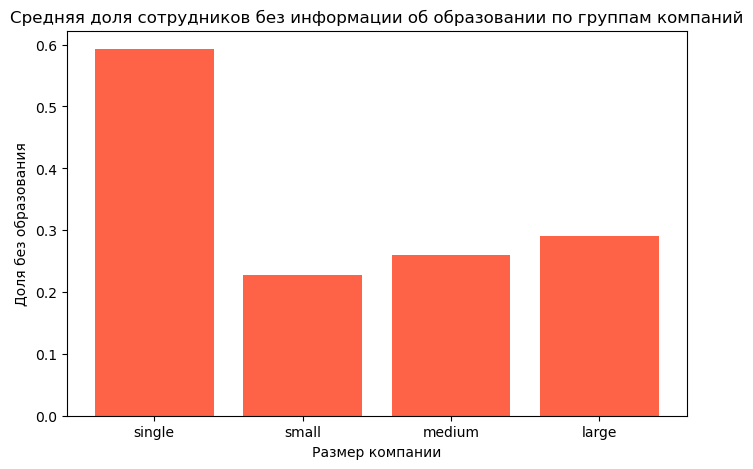

In [51]:
# Создаём контейнер для графика и задаём размер области вывода
plt.figure(figsize=(8,5))

# Строим стобчатую диаграмму
plt.bar(result['size_group'], result['share_without_edu'], color='tomato')

# Настраиваем оформление графика
plt.title('Средняя доля сотрудников без информации об образовании по группам компаний')
plt.ylabel('Доля без образования')
plt.xlabel('Размер компании')

# Выводим график
plt.show()

**Результаты:**

Компании были разделены на группы по числу сотрудников (используя квантили) и для каждой определена средняя доля сотрудников без информации об образовании в каждой группе.

1. Одиночные компании (single)
Здесь наблюдается наибольшая доля сотрудников без данных об образовании (почти 60%). Это может быть связано с тем, что в таких компаниях часто фигурируют основатели, по которым данные неполные или отсутствуют в принципе.

2. Малые компании (small, 2 сотрудника)
Наименее проблемная группа — всего около 23% сотрудников без сведений об образовании. Вероятно, это связано с тем, что такие компании чаще формируются из небольшой команды универсальных специалистов.

3. Средние и крупные компании (medium и large)
В этих группах доля сотрудников без информации немного выше, чем у малых компаний (26–29%). Это логично: при росте числа сотрудников вероятность неполноты данных возрастает (не все сотрудники представлены в открытых источниках).

**Вывод:** гипотеза заказчика о том, что полнота сведений об образовании может зависеть от размера компании, подтверждается частично.

У single-стартапов действительно проблема наиболее выражена.
У малых компаний данные лучше, чем у средних и крупных.
Получается, что качество информации не растёт линейно с размером компании: наибольшая полнота у компаний с двумя сотрудниками, а потом снова снижается.

При дальнейшем анализе можно использовать эту зависимость, но учитывать, что для single-стартапов доля пропусков системно выше.

**Возможность присоединения degrees.csv:**
Таблица degrees.csv содержит детализацию образования: тип степени и специальность, но идентификаторы сотрудников там указаны в формате object_id (например, p:7217), и чтобы связать её с датасетом education.csv, нужно очистить поле (удалить префикс p: и привести к int).

Однако для текущей задачи (полнота сведений) достаточно факта наличия записи в датасете education.csv, т.е. датасет degrees.csv не нужен, но его можно использовать если заказчик захочет изучить детализацию уровня образования, а не просто факт его наличия.

### Объединять или не объединять — вот в чём вопрос


Выясним подходит ли для объединения данных столбец `network_username`, который встречается в датасетах `company_and_rounds.csv` и `people.csv`.

Создадим функцию для проверки уникальности значений в каждом столбце датасета. Функция будет возвращать общее количество непустых записей, число уникальных значений, а также количество и долю дубликатов.

In [52]:
# Создадим функцию 
def username_stats(df, col_name):
    total = df[col_name].count()        # количество непустых
    unique = df[col_name].nunique()     # уникальных значений
    duplicates = total - unique
    print(f"{col_name}:")
    print(f"  Всего непустых: {total}")
    print(f"  Уникальных: {unique}")
    print(f"  Дубликатов: {duplicates} ({round(duplicates/total,2)})\n")

Проведём проверку уникальности значений в столбце `network_username` для датасетов `company_and_rounds.csv` и `people.csv`, чтобы оценить возможность их последующего объединения.

In [53]:
# Применим функцию
username_stats(people_df, 'network_username')
username_stats(companies_rounds_df, 'network_username')

network_username:
  Всего непустых: 38867
  Уникальных: 38384
  Дубликатов: 483 (0.01)

network_username:
  Всего непустых: 95534
  Уникальных: 79374
  Дубликатов: 16160 (0.17)



Также определим количество общих значений в столбце `network_username` между датасетами `company_and_rounds.csv` и `people.csv`, чтобы понять, насколько они пересекаются.

In [54]:
# Найдем пересечения между датасетами
ppl_usernames = set(people_df['network_username'].dropna())
com_usernames = set(companies_rounds_df['network_username'].dropna())
common_usernames = ppl_usernames & com_usernames
print(f"Количество совпадений network_username между датасетами: {len(common_usernames)}")
print(f"Доля совпадений от общего числа никнеймов сотрудников: {round(len(common_usernames)/len(ppl_usernames),2)}")
print(f"Доля совпадений от общего числа никнеймов компаний: {round(len(common_usernames)/len(com_usernames),2)}")

Количество совпадений network_username между датасетами: 2503
Доля совпадений от общего числа никнеймов сотрудников: 0.07
Доля совпадений от общего числа никнеймов компаний: 0.03


**Результаты:**
 - В датасете сотрудников (`people.csv`) никнеймы почти уникальны — лишь 1% повторов.
 - В датасете компаний (`company_and_rounds.csv`) дубликаты встречаются часто — около 17%, то есть один и тот же никнейм может быть у нескольких компаний.
 - Совпадения никнеймов между сотрудниками и компаниями крайне редки — всего 2503 совпадений, что составляет лишь 7% сотрудников и 3% компаний.

**Вывод:**

Из-за высокой доли дубликатов и крайне низкого пересечения никнеймов **столбец `network_username` не рекомендуется использовать** для объединения данных между датасетами, так как объединение будет неполным и ненадёжным. 

Визуализируем количество совпадений `network_username` между датафреймами с помощью диаграммы Венна.

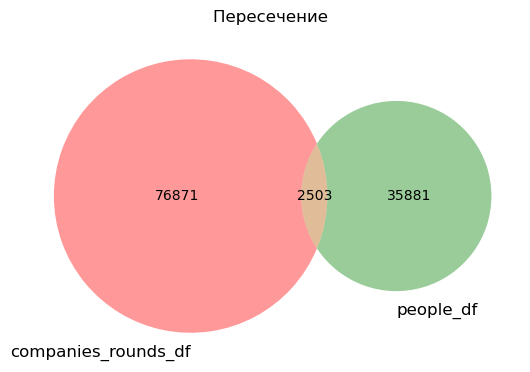

In [55]:
first_id = set(companies_rounds_df['network_username'].dropna().unique())
second_id = set(people_df['network_username'].dropna().unique())
# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('companies_rounds_df', 'people_df'))

# Отображаем график
plt.title("Пересечение ")
plt.show()


### Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.


Преобразуем данные датасета `company_and_rounds.csv` в формат, удобный для анализа на уровне отдельных компаний. При этом максимально сохраним исходную информацию и её связность, минимизируя риск ошибок. Итоговый набор данных должен позволять легко отбирать компании по заданным параметрам и рассчитывать показатели напрямую для каждой компании без дополнительных промежуточных агрегаций.

Основным идентификатором выступает столбец 'company_id' (заполненность 99%). Дополнительно в датафрейме присутствует дублирующий столбец 'company_id_incomplete' (заполненность 24%). Так как часть значений может встречаться только во втором столбце, для сохранения всех доступных данных объединим их методом .combine_first().

In [56]:
# Объединим данные из двух столбцов
companies_rounds_df['company_id'] = companies_rounds_df['company_id'].combine_first(companies_rounds_df['company_id_incomplete'])

В результате основной столбец 'company_id' был дополнен значениями из 'company_id_incomplete' с использованием метода .combine_first(), что позволило повысить полноту данных. 

Проверим сколько уникальных компаний и сколько всего строк в датасете `company_and_rounds.csv`.

In [57]:
# Проверим уникальные компании
print("Всего строк:", len(companies_rounds_df))
print("Уникальных компаний:", companies_rounds_df['company_id'].nunique())

Всего строк: 217774
Уникальных компаний: 196785


Ожидается, что одна компания может иметь несколько строк — по числу раундов финансирования, т.е фактическому числу траншей финансирования, которые могут быть разбиты внутри одного инвестиционного раунда.

На базе датасета `company_and_rounds.csv` сформируем датафрейм `company_info`, в котором каждая строка будет представлять уникальную компанию, а столбцы — её основные характеристики.

In [58]:
# Создадим датафрейм с данными о компании
company_info = (
    companies_rounds_df
    .drop_duplicates(subset=['company_id'])  # одна строка на компанию
    .loc[:, [
        'company_id', 'name', 'category_code', 'status',
        'founded_at', 'closed_at', 'domain', 'network_username',
        'country_code', 'investment_rounds', 'funding_rounds',
        'funding_total', 'milestones']].reset_index(drop=True)
)

In [59]:
# Проверим результат
print("company_info:", company_info.shape)
company_info.head()

company_info: (196785, 13)


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0,3,39750000.0,5
1,10,flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,usa,0,0,0.0,0
2,100,there,games_video,acquired,NaT,NaT,there.com,NaN,usa,0,0,0.0,4
3,10000,mywebbo,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0,0,0.0,0
4,10001,the movie streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0,0,0.0,0


Из датасета `company_and_rounds.csv` сформируем датафрейм `fund_rounds` с данными о раундах финансирования, где каждая строка будет соответствовать отдельному раунду, а для одной компании может быть представлено несколько записей.

In [60]:
# Создадим датафрейм с данными о раундах 
fund_rounds = (
    companies_rounds_df
    .dropna(subset=['funding_round_id'])  # раунды должны иметь id
    .loc[:, [
        'funding_round_id', 'company_id', 'funded_at',
        'funding_round_type', 'raised_amount',
        'pre_money_valuation', 'participants',
        'is_first_round', 'is_last_round']].reset_index(drop=True)
)

In [61]:
# Проверим результат
print("fund_rounds:", fund_rounds.shape)
fund_rounds.head()

fund_rounds: (52928, 9)


,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888,1,2005-10-01,series-a,5250000.0,0.0,2,0,1
1,889,1,2007-01-01,series-b,9500000.0,0.0,3,0,0
2,2312,1,2008-05-19,series-c+,25000000.0,0.0,4,1,0
3,1644,1001,2008-02-26,series-a,5000000.0,0.0,3,1,1
4,6682,10014,2008-09-01,angel,0.0,0.0,1,1,1


**Результат:**

 - `company_info` — таблица одна строка на компанию, удобно анализировать компанию, статус, страну, общее финансирование.
 - `fund_rounds` — таблица, где несколько строк на компанию, удобно анализировать каждый раунд: дату, сумму, тип финансирования, участников.


## Исследовательский анализ объединённых таблиц



### Объединение данных


Для дальнейшего анализа выделим компании, которые потенциально интересны заказчику, то есть те, у которых была зафиксирована инвестиционная активность либо смена владельцев.

В качестве основы возьмём созданный датафрейм `company_info` и оставим только те компании, для которых выполняется хотя бы одно из условий:
 - количество funding_rounds > 0,
 - количество investment_rounds > 0,
 - статус компании равен acquired.

In [62]:
# Фильтруем компании 
focus_companies = (
    company_info[
        (company_info['investment_rounds'] > 0) |
        (company_info['funding_rounds'] > 0) |
        (company_info['status'] == 'acquired')
    ].copy()
)

# Вывод на экран
print("Количество компаний в выборке:", focus_companies['company_id'].nunique())
focus_companies.head()

Количество компаний в выборке: 40747


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0,3,39750000.0,5
1,10,flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,usa,0,0,0.0,0
2,100,there,games_video,acquired,NaT,NaT,there.com,NaN,usa,0,0,0.0,4
13,1001,friendfeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,usa,0,1,5000000.0,3
18,10014,mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,usa,0,1,0.0,4


**Результат:**

В качестве основы для анализа были выделены компании, представляющие интерес для заказчика, — те, кто получал финансирование или участвовал в сделках по смене владельцев. Для этого из датафрейма `company_info` отобраны записи, где зафиксированы инвестиционные или финансовые раунды ('investment_rounds' > 0 или 'funding_rounds' > 0), либо статус компании равен 'acquired'.
В выборку вошли 40 747 уникальных компаний. Среди них присутствуют как действующие компании с историей привлечения инвестиций, так и компании, которые были куплены. Такой отбор позволяет сосредоточиться только на целевых объектах, исключая нерелевантные данные.


### Анализ выбросов


Заказчику важно понять, какие объёмы финансирования компаний можно считать типичными для рассматриваемого периода, а какие являются аномально большими. Для этого проанализируем распределение значений по столбцу `funding_total`. Вначале рассмотрим основные статистические характеристики, используя метод .describe().

In [63]:
# Изучаем статистические показатели столбца funding_total
focus_companies['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646543e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

**Результаты:**
 - count = 40747 — это размер выборки (те компании, которые потенциально интересны заказчику, то есть те, у которых была зафиксирована инвестиционная активность либо смена владельцев).
 - mean (среднее) = 10,1 млн.долл. — среднее значение финансирования. Оно сильно завышено из-за наличия экстремальных выбросов (очень крупных сделок).
 - std (стандартное отклонение) = 56 млн.долл. — большая величина относительно среднего подтверждает сильную разбросанность данных и наличие аномально высоких значений.
 - min = 0 — часть компаний финансирования не привлекала или не имеет данных о финансировании.
 - 25% = 0 — четверть компаний вообще не привлекала финансирование или не имеет данных о финансировании.
 - 50% (медиана) = 0,6 млн.долл. — половина компаний привлекла не больше 0,6 млн.долл. Медиана здесь лучше отражает «типичный» объём финансирования, чем среднее.
 - 75% = 5,7 млн.долл. — три четверти компаний привлекли не больше 5,7 млн.долл. (и только четверть компаний получила суммы выше этого уровня).
 - max = 5,7 млрд.долл. — наибольший объём финансирования, зафиксированный в выборке. Это очень крупное значение и ярко выраженный выброс, влияющий на среднее.

**Выводы:**
 - Для большинства компаний типичный объём финансирования находится в пределах до 6 млн.долл.
 - Наличие компаний с финансированием в миллиарды сильно искажает среднее, поэтому для оценки размера общего финансирования компании лучше использовать медиану и межквартильные значения, а не среднее.

Для наглядного отображения распределения общего объема финансирования построим диаграмму размаха (boxplot), при этом выбросы на графике отключим, чтобы лучше видеть детали.

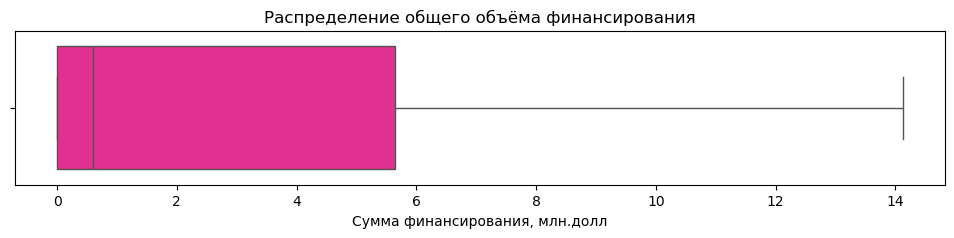

In [64]:
# Создаём контейнер для графика и задаём размер области вывода
plt.figure(figsize=(12, 2))

# Добавим новый столбец с финансированием в миллионах долларов
focus_companies['funding_total_mln'] = focus_companies['funding_total'] / 1e6

# Строим boxplot (ящик с усами) для столбца funding_total
sns.boxplot(data=focus_companies, x='funding_total_mln', color='deeppink', showfliers=False)

# Настраиваем оформление графика
plt.xlabel('Сумма финансирования, млн.долл')
plt.title('Распределение общего объёма финансирования')

# Выводим график
plt.show()

Диаграмма размаха (boxplot) подтверждает сильный перекос распределения - основная масса значений сосредоточена в диапазоне от сотен тысяч до нескольких миллионов долларов.

**Вывод:**  для большинства компаний, представляющие интерес для заказчика, типичный объём привлечённых средств **не превышает 6 млн.долл.**, при этом медианное значение составляет около 600 тыс.долл.


### Куплены забесплатно?


Для дальнейшего анализа из датафрейма `focus_companies`, содержащего информацию о компаниях, представляющих интерес для заказчика, выделим те, которые были проданы по символической цене (0 или 1 доллар), несмотря на наличие ранее привлечённого ненулевого объёма финансирования.

Для этого объединим два источника данных:
 - `acquisitions_df` — информация о сделках по приобретению компаний,
 - `focus_companies` — основные сведения о компаниях, представляющих интерес.

После объединения отфильтруем итоговый датасет по следующим условиям:
 - общий объём финансирования компании (`'funding_total'`) больше нуля;
 - сумма сделки (`'price_amount'`) равна 0 или 1 доллар.

In [65]:
# Объединяем датафреймы
acquired_focus_companies_df = acquisitions_df.merge(
    focus_companies,
    left_on='acquired_company_id',
    right_on='company_id',
    how='inner')

Объединение выполнено по столбцам, содержащим идентификатор компании, с использованием параметра `how='inner'`, что позволяет вывести информацию о компаниях, по которым одновременно проходили сделки и представляющие интерес для заказчика.

In [66]:
# Отфильтруем по условиям
symbolic_value_companies = acquired_focus_companies_df[
    (acquired_focus_companies_df['price_amount'].isin([0, 1])) &
    (acquired_focus_companies_df['funding_total'] > 0)]

In [67]:
# Выводим результат
display(symbolic_value_companies[['name', 'price_amount', 'funding_total']].head())
print(f"Всего таких компаний: {symbolic_value_companies.shape[0]}")

,name,price_amount,funding_total
7,reddit,0,100000.0
49,maya's mom,0,1000000.0
51,glimpse,0,4000000.0
65,newsvine,0,1250000.0
85,beliefnet,0,7000000.0


Всего таких компаний: 1618


В результате анализа удалось выделить нетипичные сделки: компании, которые, несмотря на полученное ранее финансирование, были проданы всего за 0 или 1 доллар. Таких случаев выявлено 1618 из 40747 компаний.

Проанализируем, какие объёмы финансирования можно считать типичными для компаний, которые, несмотря на ранее привлечённые средства, были проданы за символическую сумму (0 или 1 доллар). Для этого рассчитаем аналитически верхнюю и нижнюю границы выбросов по столбцу `funding_total` и определим, каким процентилям соответствуют эти границы.

In [68]:
# Находим первый квартиль (25% значений ниже этого порога)
Q1 = symbolic_value_companies["funding_total"].quantile(0.25)

# Находим второй квартиль (50% значений ниже этого порога)
Q2 = symbolic_value_companies["funding_total"].quantile(0.5)

# Находим третий квартиль (75% значений ниже этого порога)
Q3 = symbolic_value_companies["funding_total"].quantile(0.75)

# Находим межквартильный размах (IQR)
IQR = Q3 - Q1

# Находим нижнюю границу для определения выбросов
lower_bound = max(0, Q1 - 1.5 * IQR)

# Находим верхнюю границу для определения выбросов
upper_bound = Q3 + 1.5 * IQR

# Выводим результат
print("Q1 (25%):", Q1)
print("Q2 (50%):", Q2)
print("Q3 (75%):", Q3)
print("IQR:", IQR)
print("Нижняя граница:", lower_bound)
print("Верхняя граница:", upper_bound)

Q1 (25%): 2000000.0
Q2 (50%): 6000000.0
Q3 (75%): 15500000.0
IQR: 13500000.0
Нижняя граница: 0
Верхняя граница: 35750000.0


In [69]:
# Рассчитаем процентиль для нижней и верхней границы
lower_percentile = round(percentileofscore(symbolic_value_companies["funding_total"], lower_bound, kind='rank'))
upper_percentile = round(percentileofscore(symbolic_value_companies["funding_total"], upper_bound, kind='rank'))

# Выводим результат
print(f"Нижняя граница ({lower_bound}) соответствует примерно {lower_percentile} перцентилю")
print(f"Верхняя граница ({upper_bound}) соответствует примерно {upper_percentile} перцентилю")

Нижняя граница (0) соответствует примерно 0 перцентилю
Верхняя граница (35750000.0) соответствует примерно 91 перцентилю


Для наглядного отображения распределения общего объема финансирования построим диаграмму размаха (boxplot), при этом выбросы на графике отключим, чтобы лучше видеть детали.

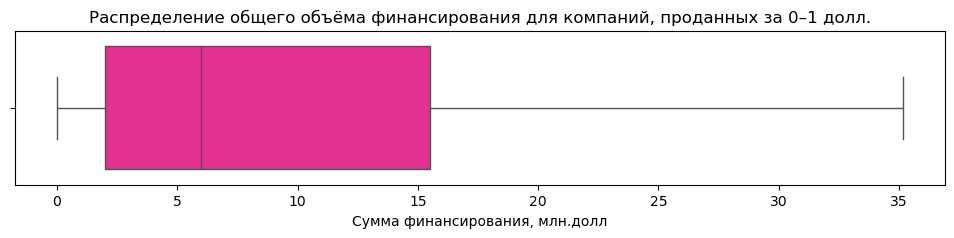

In [70]:
# Создаём контейнер для графика и задаём размер области вывода
plt.figure(figsize=(12, 2))

# Строим boxplot (ящик с усами) для столбца funding_total
sns.boxplot(data=symbolic_value_companies, x='funding_total_mln', color='deeppink', showfliers=False)

# Настраиваем оформление графика
plt.xlabel('Сумма финансирования, млн.долл')
plt.title('Распределение общего объёма финансирования для компаний, проданных за 0–1 долл.')

# Выводим график
plt.show()

Диаграмма размаха подтверждает сильный перекос: большинство значений сосредоточено в нижнем диапазоне до 15 млн.долл.

Определим количество компаний, проданных за символическую цену, у которых объём привлечённого финансирования превышает верхнюю границу выбросов (более 35,37 млн.долл.)

In [71]:
# Отфильтруем компании с выбросами
outliers_df = symbolic_value_companies[symbolic_value_companies["funding_total"] > upper_bound]

# Выводим результат
display(outliers_df[["name", "funding_total"]].sort_values(by="funding_total", ascending=False).head())
print(f"Количество компаний-выбросов: {outliers_df.shape[0]}")

,name,funding_total
7198,clearwire,5.700000e+09
4655,fanatics,3.950000e+08
8010,fanatics,3.950000e+08
8884,horizon wind energy,3.180000e+08
5392,liberty dialysis,3.149600e+08


Количество компаний-выбросов: 147


В выборке компаний, проданных за 0 или 1 доллар, выявлено 147 компаний, у которых объём финансирования превышает верхнюю границу.

**Вывод:**

В выборке компаний, проданных за символическую цену (0 или 1 доллар), выявлено 1618 случаев из 40747 компаний. Большинство привлекло финансирование в диапазоне от 2 до 15,5 млн.долл., с медианой 6 млн.долл. При этом 147 компаний имеют финансирование выше верхней границы выбросов (свыше 35,75 млн.долл.), что может свидетельствовать о нестабильном положении компаний или специфических стратегических сделках.


### Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Для оценки типичной цены покупки используем медиану, так как она отражает «среднюю» сделку без искажения аномально крупными продажами. В качестве меры разброса будет применён межквартильный размах (IQR), позволяющий учесть вариацию основной массы сделок и исключить влияние экстремальных выбросов.

Сгруппируем данные по категории области деятельности (столбец 'category_code'), где для каждой категории посчитаем:
 - медиану суммы сделки (типичная цена покупки),
 - межквартильный размах IQR (разброс цен).

Далее отсортируем и выделим топ-7 категорий, где медиана и IQR максимальны.
Топ-7 — это оптимальный баланс: он показывает лидеров, но не перегружает результат. Если взять слишком мало (например, до 5 категории), то можем получить малые группы компаний с аномалиями. Если взять слишком много (например, от 10 до 15 категорий), то теряется фокус и будет сложно интерпретировать результаты.

In [72]:
# Группируем по категории и считаем медиану и межквартильный размах (IQR)
category_stats = (
    acquired_focus_companies_df.groupby('category_code')['price_amount']
    .agg(count='count', 
         median_price='median',
         Q1=lambda x: x.quantile(0.25),
         Q3=lambda x: x.quantile(0.75))
)

category_stats['IQR'] = category_stats['Q3'] - category_stats['Q1']

# Сортируем по медиане и IQR
top_7_categories = category_stats.sort_values(['median_price', 'IQR'], ascending=False).head(7)

# Выводим результат
display(top_7_categories)

,count,median_price,Q1,Q3,IQR
category_code,,,,,
nanotech,1,584000000.0,584000000.0,5.840000e+08,0.000000e+00
manufacturing,29,72000000.0,0.0,6.150000e+08,6.150000e+08
real_estate,7,50000000.0,21500000.0,9.250000e+08,9.035000e+08
automotive,5,43000000.0,0.0,2.400000e+09,2.400000e+09
biotech,454,13200000.0,0.0,2.500000e+08,2.500000e+08
hospitality,11,12500000.0,0.0,1.187500e+08,1.187500e+08
finance,40,600000.0,0.0,1.707500e+08,1.707500e+08


На основе получившейся таблицы построим столбчатые диаграммы, которые будут отражать медианные цены покупки стартапов и количество сделок по каждой категории из топ-7.

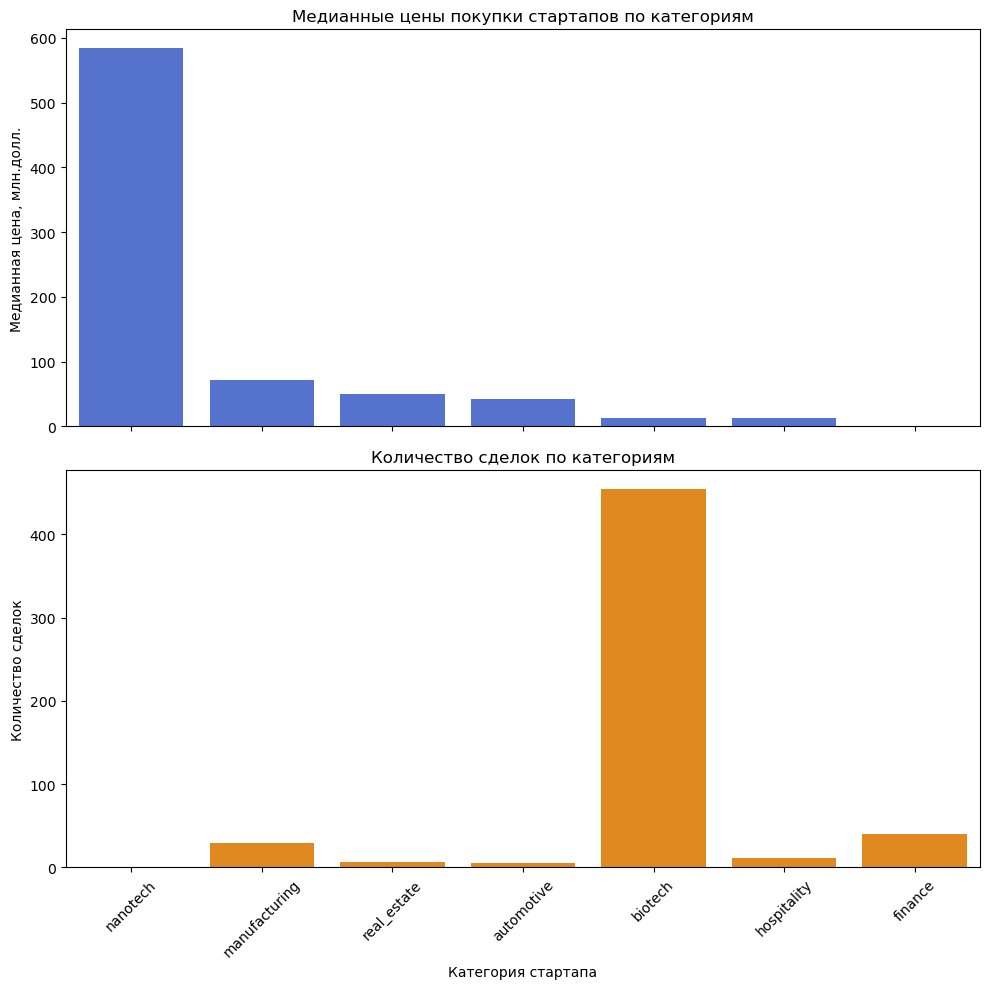

In [73]:
# Добавим новый столбец с медианной ценой продажи в миллионах долларов
top_7_categories['median_price_mln'] = top_7_categories['median_price'] / 1e6

# Создаём контейнер для графиков и задаём размер области вывода
fig, axes = plt.subplots(2, 1, figsize=(10,10), sharex=True)

# Строим график медианной цены
sns.barplot(x='category_code', y='median_price_mln', data=top_7_categories, color='royalblue', ax=axes[0])

# Настраиваем оформление графика
axes[0].set_ylabel('Медианная цена, млн.долл.')
axes[0].set_title('Медианные цены покупки стартапов по категориям')

# Строим столбчатую диаграмму количества сделок 
sns.barplot(x='category_code', y='count', data=top_7_categories, color='darkorange', ax=axes[1])

# Настраиваем оформление графика
axes[1].set_ylabel('Количество сделок')
axes[1].set_title('Количество сделок по категориям')
plt.xticks(rotation=45)
plt.xlabel('Категория стартапа')

# Выводим график
plt.tight_layout()
plt.show()

**Результаты:**

**1. Nanotech**

- Медианная цена покупки: 584 млн.долл. (но всего 1 сделка)
- Категория выглядит перспективной по цене, но статистически нерепрезентативна — выводы о рынке делать сложно.
- Подходит скорее для нишевых, высокорискованных стратегий крупных инвесторов.

**2. Manufacturing**

- Медианная цена покупки: 72 млн.долл. при 29 сделках.
- Значительный разброс цен (IQR около 615 млн.долл.) указывает на высокую вариативность сделок.
- Категория более устойчивая, статистически репрезентативная.

**3. Real estate**

- Медианная цена покупки: 50 млн.долл., всего 7 сделок.
- Очень высокий разброс (IQR около 903 млн.долл.), что говорит о большом диапазоне цен.
- Высокорискованная ниша, где отдельные сделки могут сильно влиять на картину.

**4. Automotive**

- Медианная цена покупки: 43 млн.долл., 5 сделок.
- Максимальный разброс (IQR = 2,4 млрд.долл.), что делает категорию крайне волатильной.
- Подходит для спекулятивных инвестиций, но статистически ненадёжна.

**5. Biotech**

- Медианная цена покупки: 13,2 млн.долл., 454 сделки.
- Разброс значительный (IQR = 250 млн.долл.), но большое количество сделок делает категорию статистически надёжной.
- Категория интересна для масштабных и предсказуемых инвестиционных стратегий.

**6. Hospitality**

- Медианная цена покупки: 12,5 млн.долл., 11 сделок.
- Умеренный разброс (IQR около 119 млн.долл.), низкое число сделок снижает статистическую надёжность.

**7. Finance**

- Медианная цена покупки: 0,6 млн.долл., 40 сделок.
- Высокий разброс (IQR около 171 млн.долл.) свидетельствует о крупных отдельных сделках при низкой типичной цене.
- Репрезентативность умеренная, категория может быть интересна для диверсифицированных портфелей.

**Выводы:**

 - **Категории с высокими медианами и большим разбросом** (`nanotech, manufacturing, real estate, automotive`) привлекательны для крупных инвесторов, готовых к высоким рискам ради потенциально больших доходов.

 - **Статистически надёжные категории** (`biotech, manufacturing, finance`) позволяют строить прогнозы и оценивать рынок более уверенно.

 - **Нишевые категории с малым числом сделок** (`nanotech, automotive, real estate`) могут давать искажённую картину из-за отдельных сверхдорогих сделок.


### Сколько раундов продержится стартап перед покупкой


Для оценки интересующего заказчика типичного количества раундов финансирования проанализируем столбец `funding_rounds` с учётом статуса стартапа на основе данных датафрейма `focus_companies`, включающего компании, представляющие интерес для заказчика.

In [74]:
# Группировка по статусу
status_funding_stats = (
    focus_companies
    .groupby('status')['funding_rounds']
    .agg(['count', 'mean', 'median', 'max'])
    .sort_values('mean', ascending=False)
)

# Выводим результат
status_funding_stats

,count,mean,median,max
status,,,,
ipo,640,1.934375,1.0,13
operating,28621,1.522658,1.0,15
closed,2092,1.381453,1.0,8
acquired,9394,0.523526,0.0,12


 - Для большинства стартапов типичное количество раундов финансирования (медиана) для всех групп равно 0–1, что означает, что половина компаний прошла не более одного раунда.

 - Среднее количество раундов выше медианы, что указывает на наличие компаний с большим числом раундов, влияющих на среднее значение.

Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. 

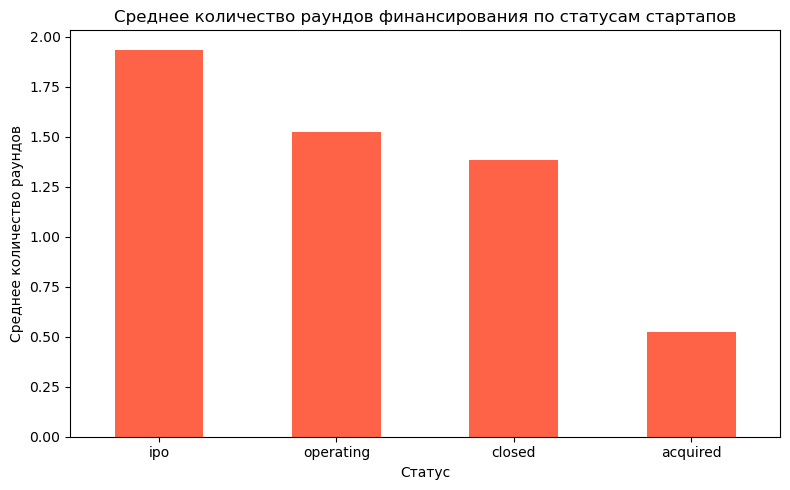

In [75]:
# Создаём контейнер для графика и задаём размер области вывода
plt.figure(figsize=(8,5))

# Строим стобчатую диаграмму
status_funding_stats['mean'].plot(kind='bar', color='tomato')

# Настраиваем оформление графика
plt.title('Среднее количество раундов финансирования по статусам стартапов')
plt.xlabel('Статус')
plt.ylabel('Среднее количество раундов')
plt.xticks(rotation=0)

# Выводим график
plt.tight_layout()
plt.show()

**Результаты:**

 - IPO: среднее около 1,93, медиана 1, максимальное количество раундов 13. Компании, дошедшие до IPO, в среднем проходят больше раундов, чем остальные группы.
 - Operating: среднее около 1,52, медиана 1, максимальное количество раундов 15. Действующие компании чаще имеют 1–2 раунда финансирования, но встречаются редкие случаи с большим числом раундов.
 - Closed: среднее около 1,38, медиана 1, максимальное количество раундов 8. Закрытые компании обычно привлекали меньше раундов, чем действующие или IPO.
 - Acquired: среднее около 0,52, медиана 0, максимальное количество раундов 12. Компании, приобретённые другими, чаще всего имеют 0 раундов — многие сделки проходят без привлечения активного финансирования.

**Выводы:**

Анализ количества раундов финансирования показал, что большинство компаний, которые интересны заказчику, проходило **не более 1 раунда**. Наибольшее среднее количество раундов характерно для компаний, достигших стадии IPO (1,93), и действующих компаний (1,52), тогда как закрытые компании и приобретённые стартапы привлекали меньше раундов. Медиана для всех групп равна 0–1, что указывает на типичное количество раундов, а более высокие средние значения объясняются редкими случаями с большим числом раундов.


## Итоговый вывод и рекомендации

Опишите, что было сделано в проекте, какие были сделаны выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах.

По проекту выполнено следующее:

1. Загрузка и первичное знакомство с данными:
- Были рассмотрены датафреймы с информацией о компаниях, сотрудниках этих компаний, раундах финансирования и сделках по приобретению.
- Проверена корректность типов данных и наличие полных дубликатов.
- Выявлены пропущенные значения и дублирующие столбцы.

2. Предобработка данных:
- Приведены названия столбцов к единому стилю (snake_case).
- Объединены дублирующие столбцы с помощью .combine_first() для сохранения всех доступных данных.
- Проведена оптимизация типов данных для экономии памяти.

3. Предварительный анализ данных:
- Определен типичный размер средств, выделяемый в рамках одного раунда финансирования.
- Определено общее количество раундов финансирования.
- Проверена гипотеза о зависимости полноты сведений о компании от ее размера.
- Проверено походит ли для объединения столбец network_username, встречающийся в разных датасетах.
- Был разделе датасет для удобства дальнейшего анализа на уровне отдельных компаний.
  
5. Исследовательский анализ данных:
- Выделены компании, представляющие интерес для заказчика: те, которые получали финансирование или участвовали в сделках по приобретению.
- Рассмотрен общий объём финансирования, выявлены типичные значения и выбросы, определены верхние и нижние границы по IQR.
- Выделены компании, проданные за символическую цену (0 или 1 доллар), и проанализированы их показатели финансирования.
- Выделены топ-7 категорий старапов с типично высокими ценами покупки и наибольшим разбросом цен.
- Изучено количество раундов финансирования для разных статусов стартапов (IPO, operating, closed, acquired).

**Основные выводы:**

1. Динамика финансирования стартапов
 - Пик типичных размеров раундов пришёлся на 2005 год (около 5,5 млн.долл.).
 - В 2013 году зафиксирован рекорд по числу раундов (11072), но их медианный размер снизился до 1,2 млн.долл.
 - Финансирование показывает разные фазы развития рынка: рост числа сделок в 2013 г. сопровождался уменьшением типичного объёма раунда.

2. Полнота данных об образовании сотрудников
 - В single-стартапах доля сотрудников без данных об образовании самая высокая (60%).
 - В малых компаниях (2 сотрудника) качество данных лучше всего (23% пропусков).
 - В средних и крупных — 26–29% пропусков.
 - Проверка гипотезы заказчика о влиянии размера компании на полноту данных частично подтвердилась: наибольшая полнота у малых компаний, а для самых маленьких (single) наоборот наблюдается системная нехватка данных.

3. Анализ network_username
 - Пересечение никнеймов между сотрудниками и компаниями минимальное (7% и 3%).
 - Метрику network_username для объединения использовать нельзя.

4. Структура итоговых таблиц
 - Данные структурированы в два уровня анализа: компании и раунды.

5. Отбор компаний для анализа
 - В выборку вошло 40747 компаний, которые получили инвестиции или были куплены.
 - Для большинства из них типичный объём привлечённых средств не превышает 6 млн.долл., медиана — около 600 тыс.долл. Рынок характеризуется большим количеством относительно небольших сделок.

6. Компании, проданные за символическую цену
 - Таких случаев выявлено 1618 из 40747.
 - Большинство привлекало от 2 до 15,5 млн.долл. (медиана — 6 млн.долл.).
 - Около 147 компаний имели финансирование выше 35,75 млн.долл. Возможно это признак проблемного состояния или особых стратегических сделок.

7. Анализ категорий сделок (топ-7 категорий)
 - Категории с высокими медианами и разбросом (nanotech, real estate, automotive) интересны крупным инвесторам, но высокорискованные.
 - Biotech и finance — статистически более надёжные ниши, с большим числом сделок.

8. Количество раундов финансирования по статусу компаний
 - Большинство компаний проходило 0 или 1 раунд.
 - Больше всего раундов у компаний, дошедших до IPO (среднее 1,93) и у действующих (1,52).
 - Закрытые и приобретённые компании обычно имели меньше раундов, что говорит о более слабом инвестиционном интересе или стратегическом выкупе без значительного финансирования.

**Рекомендации:**

1. Фокус на наиболее перспективные отрасли
 - Рассматривать категории с высокой статистической надёжностью (biotech, finance, manufacturing) как основу для прогнозов и диверсифицированных стратегий.
 - Категории с редкими, но крупными сделками (nanotech, real estate, automotive) можно использовать как дополнение к портфелю для рискованных вложений, но не как базу для системных решений.

2. Оценка риска сделок по символической цене
 - Обратить внимание на компании, проданные за 0 или 1 доллар: несмотря на значительные привлечённые инвестиции, они могут указывать на финансовые проблемы или неудачные стратегии выхода.
 - Такие кейсы стоит рассматривать как сигналы для улучшения риск-моделей и проверки устойчивости стартапов.

3. Интерпретация объёмов финансирования
 - Учитывать, что типичный объём инвестиций в сделки не превышает 6 млн.долл., а медиана — около 600 тыс.долл. Это говорит о том, что рынок преимущественно состоит из мелких и средних стартапов, и прогнозирование должно быть ориентировано именно на такие компании.

4. Учет стадии развития компании
 - Стартапы, дошедшие до IPO, показывают более высокую устойчивость и интерес инвесторов (большее число раундов).
 - Приобретённые компании чаще всего привлекают мало или вовсе не привлекают финансирования,поэтому при отборе таких сделок нужно учитывать не финансовые показатели, а стратегическую ценность (технологии, команду).